In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
ds_test = pd.read_csv('../data.csv')

In [4]:
data = ds_test.values[:, 1:]
labels = ds_test.values[:,0]
print labels.shape
print data.shape

data_std = (data - data.mean(axis=0))/(data.std(axis=0)+0.0001)
print data_std.shape

mean_std = np.mean(data_std, axis=0)
cm_std = np.cov(data_std, rowvar=0)

print mean_std.shape, cm_std.shape

(60000,)
(60000, 784)
(60000, 784)
(784,) (784, 784)


In [16]:
eig_val_std, eig_vec_std = np.linalg.eig(cm_std)
print eig_val_std.shape, eig_vec_std.shape

all_vals = []                          #basically collecting evals and evecs together
for (ix, iv) in zip(eig_val_std, eig_vec_std):
    all_vals.append([ix, iv])          #appending a tuple of list of eval, evec

print len(all_vals)
print all_vals[0][1].shape

(784,) (784, 784)
784
(784,)


In [17]:
new_vals = sorted(all_vals, key=lambda x: x[0], reverse=True)    #Basically sorting all_vals on basis of eigen values

eig_val = []
eig_vec = []

for ix in new_vals:
    eig_val.append(ix[0])    #collecting all eigen values in one list, in DESCENDING SORTED ORDER
    eig_vec.append(ix[1])    #collecting all corresponding eigen vectors in one list

eig_val = np.asarray(eig_val)
eig_vec = np.asarray(eig_vec)

print eig_val.shape, eig_vec.shape

(784,) (784, 784)


In [18]:
eig_cm = np.cumsum(eig_val)/np.sum(eig_val)
print eig_cm.shape

for ix in range(eig_cm.shape[0]):
    if eig_cm[ix] >= 0.95:        #finding parameter till which 95% data is expressed
        print ix
        break

(784,)
255


In [19]:
eig_pairs = [(np.abs(eig_val_std[i]), eig_vec_std[:,i])    #again collecting eigen values and eigen vectors together but this time in sorted order- sorted in DESC order according to Eigen Values
             for i in range(len(eig_val_std))]

eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse=True)

In [20]:
k = 255     #select k dimensions out of all dimensions for feature space
d = eig_pairs[0][1].shape[0]
selected = []

for ix in range(k):
    selected.append(eig_pairs[ix][1].reshape(d, 1))

print len(selected)
# Now stack the selected eigenvectors in W matrix
mat_W = np.hstack(selected)
print mat_W.shape           #This is the transformation matrix

255
(784, 255)


In [21]:
print mat_W

[[ 0.00031361  0.00017912 -0.0001148  ..., -0.00814348  0.0249435
  -0.00169859]
 [ 0.00088094  0.00144965 -0.00085962 ...,  0.02838105 -0.04250944
  -0.0121637 ]
 [ 0.00149312  0.00115863 -0.00188637 ..., -0.01500833  0.00489471
   0.02064461]
 ..., 
 [ 0.00649126  0.01408332 -0.00893998 ...,  0.05413359  0.01958647
   0.01994844]
 [ 0.00146608  0.00961557  0.00232464 ..., -0.03993752 -0.05531489
   0.0432404 ]
 [ 0.00066757  0.00409067  0.00124441 ..., -0.03277735  0.05775645
   0.01436443]]


In [ ]:
'''
All the above work can be done easily with sklearn (sci-kit learn)
'''

In [18]:
import sklearn
from sklearn.decomposition import PCA
import datetime

In [29]:
pca = PCA(n_components=319)

X = pca.fit_transform(data_std)    #returns fitted and transformed data set
print X.shape

(42000, 319)


In [30]:
trans_cm = np.cov(X, rowvar=0)
print trans_cm[:4, :4]           #now we can see that the transformed matrix has a very nice covariance matrix ie. covariance of parameters is very less - therefore, made well independent with help of PCA
new_mat = np.asarray(trans_cm, dtype='uint8')
print new_mat[:10, :10]

[[  4.06963682e+01   7.24094123e-16   6.96754495e-15   4.86496510e-15]
 [  7.24094123e-16   2.91113604e+01   4.41968105e-15  -1.51180025e-14]
 [  6.96754495e-15   4.41968105e-15   2.67832509e+01   9.41593050e-15]
 [  4.86496510e-15  -1.51180025e-14   9.41593050e-15   2.08146509e+01]]
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 10]]


In [37]:
v = pca.explained_variance_ratio_     #simply returns the vector containing contribution of eigen vector
#cs = np.cumsum(v)/np.sum(v)
cs = np.cumsum(v)
print cs

[ 0.05748407  0.09860419  0.13643582  0.16583675  0.19140316  0.21370335
  0.23323035  0.25094777  0.26657557  0.28082622  0.29443735  0.30666365
  0.31802186  0.32915361  0.33965749  0.3497815   0.3592952   0.36864104
  0.37771427  0.38656816  0.39495781  0.40307866  0.41083081  0.41835446
  0.42563185  0.43261986  0.43952486  0.4461745   0.45248165  0.458645
  0.46475458  0.47072533  0.47649847  0.48223569  0.48788426  0.49334779
  0.49874237  0.5039863   0.509035    0.5139204   0.51874298  0.52350211
  0.5281022   0.53267824  0.5371742   0.54164138  0.54607997  0.5504484
  0.55477454  0.5590406   0.5632317   0.56735086  0.57137516  0.57536942
  0.57931792  0.58322577  0.58702485  0.59074951  0.59443364  0.59809088
  0.60162374  0.60513471  0.60858874  0.61200271  0.61538045  0.61874523
  0.62206211  0.62535921  0.62855934  0.63172698  0.63485375  0.63797212
  0.64105373  0.64408645  0.6471013   0.6500717   0.65302011  0.65595602
  0.65883429  0.66170256  0.66453425  0.66736264  0.67

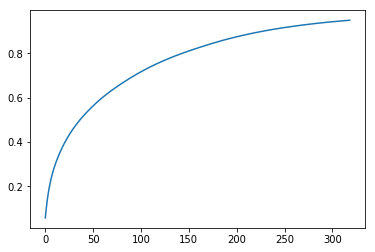

In [38]:
plt.plot(cs)
plt.show()